In [1]:
import torch
torch.set_default_tensor_type(torch.cuda.DoubleTensor)
device=torch.device('cuda:0')
torch.cuda.set_device(device)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

# use bigger pyplot font sizes
plt.rcParams.update({'font.size': 12})

from transfer_matrix import get_scaling_dimensions_from_spectrum

/home/wenhan/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# Compare RG flow of LowT, HighT and Critical Systems

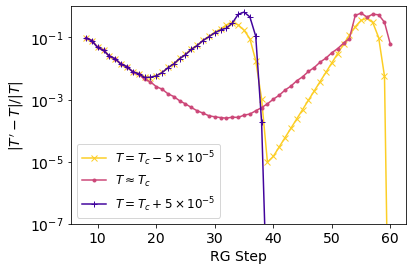

0.00025165224912563093


In [8]:
color1=plt.cm.plasma(.9)
color2=plt.cm.plasma(.5)
color3=plt.cm.plasma(.1)

curveL=torch.load("./data/hotrg_gilt_X24_lowB_curves.pth")[0]
curveH=torch.load("./data/hotrg_gilt_X24_highB_curves.pth")[0]
curveM=torch.load("./data/hotrg_gilt_X24_curves.pth")[0]
plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 14,'legend.fontsize':12})
plt.plot(curveH['layer'],curveH['diff'],'x-',color=color1,label=r'$T=T_c-5\times10^{-5}$')
plt.plot(curveM['layer'],curveM['diff'],'.-',color=color2,label=r'$T\approx T_c$')
plt.plot(curveL['layer'],curveL['diff'],'+-',color=color3,label=r'$T=T_c+5\times10^{-5}$')
plt.yscale('log')
plt.ylim(1e-7,1)
plt.xlabel('RG Step')
plt.ylabel(r"$|T'-T|/|T|$")
plt.legend()
plt.savefig('./figures/Tdiff.png',dpi=300,bbox_inches='tight')
plt.show()
print(curveM['diff'][curveM['layer']<50].min())

# Tensor components at Fixed Points

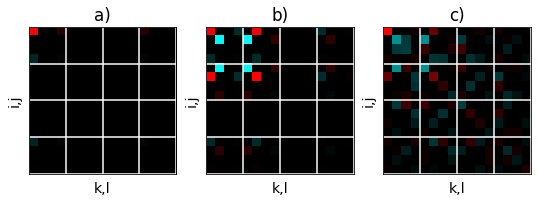

In [9]:
TsL=torch.load("./data/hotrg_gilt_X24_lowB.pth")['Ts']
TsH=torch.load("./data/hotrg_gilt_X24_highB.pth")['Ts']
TsM=torch.load("./data/hotrg_gilt_X24.pth")['Ts']
from show_tensor import show_tensor_ijkl
plt.figure(figsize=(9,3))
plt.rcParams.update({'font.size': 14,'legend.fontsize':12})
plt.subplot(131)
show_tensor_ijkl(TsL[40].cpu().numpy(),4) # low B = high T
plt.title('a)')
plt.subplot(132)
show_tensor_ijkl(TsH[40].cpu().numpy(),4)
plt.title('b)')
plt.subplot(133)
show_tensor_ijkl(TsM[30].cpu().numpy(),4)
plt.title('c)')
plt.savefig('./figures/fpTensors.png',dpi=300,bbox_inches='tight')
plt.show()

# Comparision with w/o GILT and Lyu's

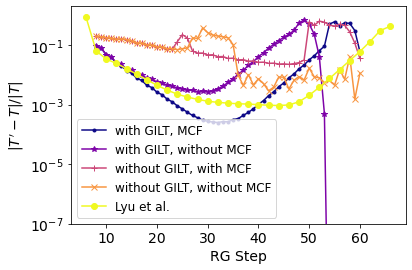

In [10]:
curveM=torch.load("./data/hotrg_gilt_X24_curves.pth")[0]
curveNG=torch.load("./data/hotrg_X24_curves.pth")[0]
curveNM=torch.load("./data/hotrg_gilt_X24_noMCF_curves.pth")[0]
curveNMNG=torch.load("./data/hotrg_X24_noMCF_curves.pth")[0]
# data_bl3=pd.read_csv('./brucelyu_RGFlow_X24.csv', names=['step','diff'])
data_bl3=pd.read_csv('./brucelyu_RGFlow_X30_e6e-5.csv', names=['step','diff'])
data_bl3['step']=data_bl3['step']*2

plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 14,'legend.fontsize':12})

colors=plt.cm.plasma(np.linspace(0,1,5))


plt.plot(curveM['layer'],curveM['diff'],'.-',color=colors[0],label='with GILT, MCF')
plt.plot(curveNM['layer'],curveNM['diff'],'*-',color=colors[1],label='with GILT, without MCF')
plt.plot(curveNG['layer'],curveNG['diff'],'+-',color=colors[2],label='without GILT, with MCF')
plt.plot(curveNMNG['layer'],curveNMNG['diff'],'x-',color=colors[3],label='without GILT, without MCF')
plt.plot(data_bl3['step'],data_bl3['diff'],'o-',color=colors[4],label='Lyu et al.')
plt.yscale('log')
plt.ylim(1e-7,2)
plt.xlabel('RG Step')
plt.ylabel(r"$|T'-T|/|T|$")
plt.legend()
plt.savefig('./figures/CompareGILTTdiff3.png',dpi=300,bbox_inches='tight')
plt.show()


# flow of scdim

In [11]:
reference_scaling_dimensions=[
    0,.125,1,1.125,
    2,2.125,3,3.125,
    4]
reference_center_charge=.5
ref_scd=np.array([0,.125,1]+[1.125]*2+[2]*4+[2.125]*3+[3]*5+[3.125]*6+[4]*9)

curve1M=torch.load("./data/hotrg_gilt_X24_curves.pth")[2]
curve1NG=torch.load("./data/hotrg_X24_curves.pth")[2]
scd_cyl_iLayer=np.array(curve1M['layer'].tolist())

scd_cyl=np.array(curve1M['scaling_dimensions'].tolist())
scd_cyl_err=(scd_cyl-ref_scd)
# print(curve1M.iloc[0])

scd_cyl_NG=np.array(curve1NG['scaling_dimensions'].tolist())
scd_cyl_err_NG=(scd_cyl_NG-ref_scd)

scd_ltrg_iLayers=[*range(2,60,2)]
scd_ltrg=[]
for iLayer in scd_ltrg_iLayers:
    filename='data/layers/hotrg_gilt_X24_lTRG_gilt_L%d.pth'%iLayer
    options,sr,ur=torch.load(filename,map_location=device)
    print(filename)
    # print(get_scaling_dimensions_from_spectrum(sr.abs(),scaling=2).tolist()[:5])
    scd_ltrg.append(get_scaling_dimensions_from_spectrum(sr.abs(),scaling=2).tolist())
    del sr,ur
scd_ltrg=np.array(scd_ltrg)

scd_ltrg_err=(scd_ltrg-ref_scd)

print(options)

data/layers/hotrg_gilt_X24_lTRG_gilt_L2.pth


data/layers/hotrg_gilt_X24_lTRG_gilt_L4.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L6.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L8.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L10.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L12.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L14.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L16.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L18.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L20.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L22.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L24.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L26.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L28.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L30.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L32.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L34.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L36.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L38.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L40.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L42.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L44.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L46.pth
data/layers/h

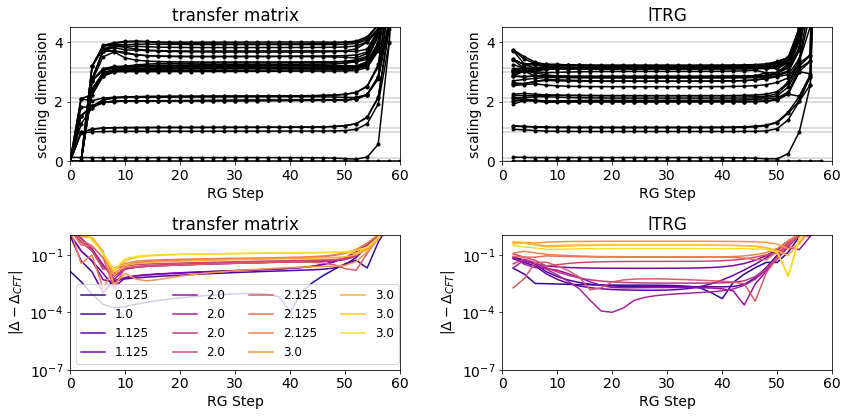

In [24]:

nk=16

plt.figure(figsize=(12,6))
# increase the font size for captions and axis labels and ticks and legends
plt.rcParams.update({'font.size': 14,'legend.fontsize':12,'xtick.labelsize':14,'ytick.labelsize':14})
plt.subplot(221)

for reference_scaling_dimension in reference_scaling_dimensions:
    plt.axhline(reference_scaling_dimension,color='lightgrey')


#plot only the even iLayers
mask=scd_cyl_iLayer%2==0
for i in range(scd_cyl.shape[1]):
    plt.plot(scd_cyl_iLayer[mask],scd_cyl[mask,i],'.-',label=ref_scd[i],color='black')

plt.xlim(0,60)
plt.ylim(0,4.5)

plt.xlabel('RG Step')
plt.ylabel('scaling dimension')
plt.title('transfer matrix')

plt.subplot(222)
for reference_scaling_dimension in reference_scaling_dimensions:
    plt.axhline(reference_scaling_dimension,color='lightgrey')

for i in range(scd_ltrg.shape[1]):
    plt.plot(scd_ltrg_iLayers,scd_ltrg[:,i],'.-',label=ref_scd[i],color='black')

plt.xlim(0,60)
plt.ylim(0,4.5)

plt.xlabel('RG Step')
plt.ylabel('scaling dimension')
plt.title('lTRG')




plt.subplot(223)
cmap=plt.get_cmap('plasma')
mask=scd_cyl_iLayer%2==0
for i in range(1,nk):
    plt.plot(scd_cyl_iLayer[mask],np.abs(scd_cyl_err[mask,i]),'-',color=cmap(i/nk),label=ref_scd[i])
#plt.legend(ncol=2)
plt.yscale('log')
plt.xlim(0,60)
plt.ylim(1e-7,1)
plt.xlabel('RG Step')
plt.ylabel(r'$|\Delta-\Delta_{CFT}|$')
plt.legend(ncol=4)
plt.title('transfer matrix')

plt.subplot(224)
for i in range(1,nk):
    plt.plot(scd_ltrg_iLayers,np.abs(scd_ltrg_err[:,i]),'-',color=cmap(i/nk),label=ref_scd[i])
    # best_step=np.argmin(scd_ltrg_err[:,i])
    # plt.plot(scd_ltrg_iLayers[best_step],scd_ltrg_err[best_step,i],'o',color=cmap(i/nk))
plt.yscale('log')
plt.xlim(0,60)
plt.ylim(1e-7,1)
plt.xlabel('RG Step')
plt.ylabel(r'$|\Delta-\Delta_{CFT}|$')
plt.title('lTRG')


# plt.rcParams['axes.titley'] = 1.0
# plt.rcParams['axes.titlepad'] = -14


plt.tight_layout()
plt.savefig('./figures/flow_scd.png',dpi=300,bbox_inches='tight')
plt.show()
    


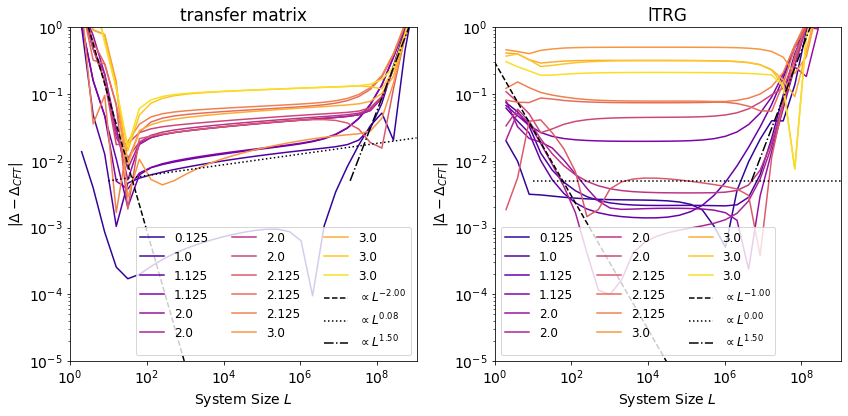

In [16]:

nk=16
loop_length=2

plt.figure(figsize=(12,6))
# increase the font size for captions and axis labels and ticks and legends
plt.rcParams.update({'font.size': 14,'legend.fontsize':12,'xtick.labelsize':14,'ytick.labelsize':14})

def plotLscaleRef(L0,A0,power,linestyle='--',color='black'):
    plt.plot([L0,2**30],[A0,A0*(2**30/L0)**(power)],linestyle,color=color,label=r'$\propto L^{%.2f}$'%power)


plt.subplot(121)
cmap=plt.get_cmap('plasma')
mask=scd_cyl_iLayer%2==0
scd_cyl_size=2**(scd_cyl_iLayer/2)*loop_length
for i in range(1,nk):
    plt.plot(scd_cyl_size[mask],np.abs(scd_cyl_err[mask,i]),'-',color=cmap(i/nk),label=ref_scd[i],alpha=1)
#plt.legend(ncol=2))
plotLscaleRef(3,1,-2,'--')
plotLscaleRef(10,5e-3,0.08,':')
plotLscaleRef(2e7,5e-3,1.5,'-.')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,2**30)
plt.ylim(1e-5,1)
plt.xlabel('System Size $L$')
plt.ylabel(r'$|\Delta-\Delta_{CFT}|$')
plt.legend(ncol=3)
plt.title('transfer matrix')

plt.subplot(122)
scd_ltrg_size=2**(np.array(scd_ltrg_iLayers)/2)
for i in range(1,nk):
    plt.plot(scd_ltrg_size,np.abs(scd_ltrg_err[:,i]),'-',color=cmap(i/nk),label=ref_scd[i],alpha=1)
    # best_step=np.argmin(scd_ltrg_err[:,i])
    # plt.plot(scd_ltrg_iLayers[best_step],scd_ltrg_err[best_step,i],'o',color=cmap(i/nk))
plotLscaleRef(3e-1,1,-1,'--')
plotLscaleRef(10,5e-3,0,':')
plotLscaleRef(5e6,5e-3,1.5,'-.')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,2**30)
plt.ylim(1e-5,1)
plt.xlabel('System Size $L$')
plt.ylabel(r'$|\Delta-\Delta_{CFT}|$')
plt.legend(ncol=3)
plt.title('lTRG')


# plt.rcParams['axes.titley'] = 1.0
# plt.rcParams['axes.titlepad'] = -14


plt.tight_layout()
plt.savefig('./figures/FiniteScaleScd.png',dpi=300,bbox_inches='tight')
plt.show()

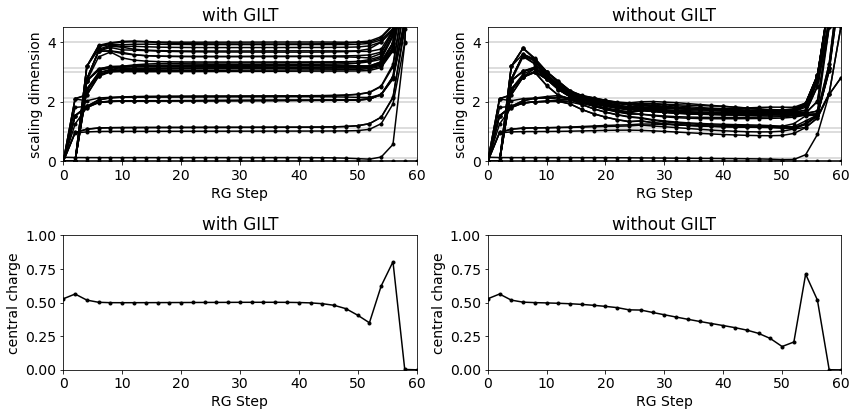

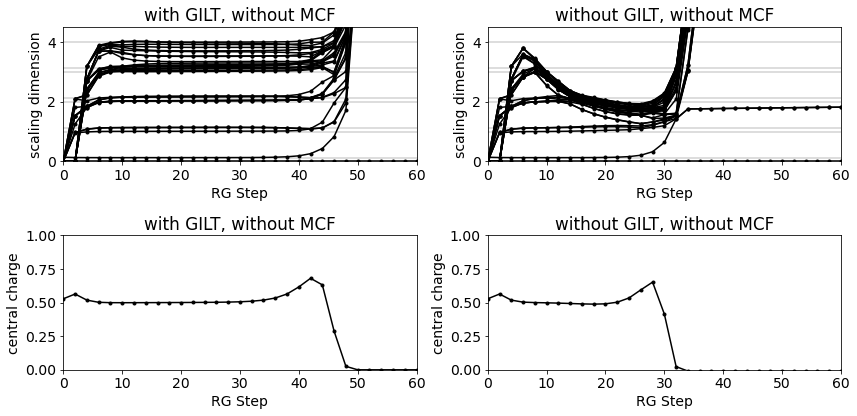

In [25]:

reference_scaling_dimensions=[
    0,.125,1,1.125,
    2,2.125,3,3.125,
    4]
reference_center_charge=.5
ref_scd=np.array([0,.125,1]+[1.125]*2+[2]*4+[2.125]*3+[3]*5+[3.125]*6+[4]*9)


def draw_scd(curve):
    scd_iLayer=np.array(curve['layer'].tolist())
    scd=np.array(curve['scaling_dimensions'].tolist())
    mask=scd_iLayer%2==0
    for reference_scaling_dimension in reference_scaling_dimensions:
        plt.axhline(reference_scaling_dimension,color='lightgrey')
    for i in range(scd.shape[1]):
        plt.plot(scd_iLayer[mask],scd[mask,i],'.-',label=ref_scd[i],color='black')
    plt.xlim(0,60);plt.ylim(0,4.5)
    plt.xlabel('RG Step');plt.ylabel('scaling dimension')

    
def draw_cc(curve):
    scd_iLayer=np.array(curve['layer'].tolist())
    cc=np.array(curve['center_charge'].tolist())
    mask=scd_iLayer%2==0
    plt.plot(scd_iLayer[mask],cc[mask],'.-',color='black')
    plt.xlim(0,60);plt.ylim(0,1)
    plt.xlabel('RG Step');plt.ylabel('central charge')


curve1M=torch.load("./data/hotrg_gilt_X24_curves.pth")[2]
curve1NG=torch.load("./data/hotrg_X24_curves.pth")[2]

plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 14,'legend.fontsize':14,'xtick.labelsize':14,'ytick.labelsize':14})

plt.subplot(221)
draw_scd(curve1M)
plt.title('with GILT')

plt.subplot(222)
draw_scd(curve1NG)
plt.title('without GILT')

plt.subplot(223)
draw_cc(curve1M)
plt.title('with GILT')

plt.subplot(224)
draw_cc(curve1NG)
plt.title('without GILT')

plt.tight_layout()
plt.savefig('./figures/CompareGILT_flow_scd.png',dpi=300,bbox_inches='tight')
plt.show()


curve1NM=torch.load("./data/hotrg_gilt_X24_noMCF_curves.pth")[2]
curve1NMNG=torch.load("./data/hotrg_X24_noMCF_curves.pth")[2]

plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 14,'legend.fontsize':14,'xtick.labelsize':14,'ytick.labelsize':14})

plt.subplot(221)
draw_scd(curve1NM)
plt.title('with GILT, without MCF')

plt.subplot(222)
draw_scd(curve1NMNG)
plt.title('without GILT, without MCF')

plt.subplot(223)
draw_cc(curve1NM)
plt.title('with GILT, without MCF')

plt.subplot(224)
draw_cc(curve1NMNG)
plt.title('without GILT, without MCF')

plt.tight_layout()
plt.show()

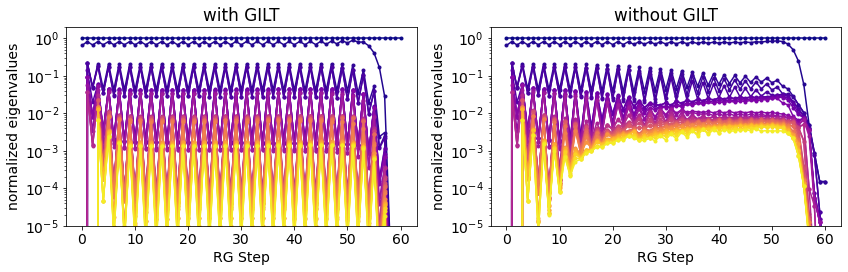

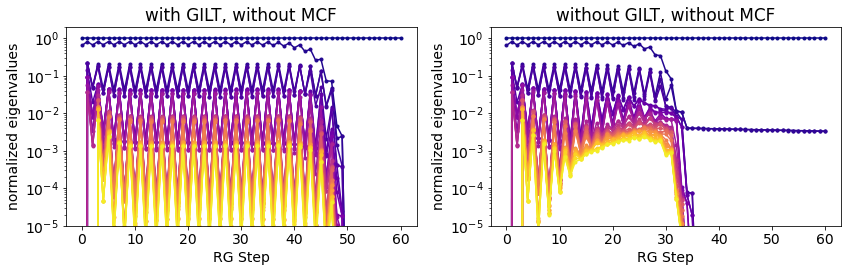

In [23]:
curve1M=torch.load("./data/hotrg_gilt_X24_curves.pth")[2]
curve1NG=torch.load("./data/hotrg_X24_curves.pth")[2]

eigs1M=np.array(curve1M['eigs'].tolist())
eigs1NG=np.array(curve1NG['eigs'].tolist())

plt.figure(figsize=(12,4))
plt.rcParams.update({'font.size': 14,'legend.fontsize':14,'xtick.labelsize':14,'ytick.labelsize':14})


def plot_eig(eigs):
    labels=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th','11th','12th','13th','14th','15th',
            '16th','17th','18th','19th','20th','21st','22nd','23rd','24th','25th','26th','27th','28th','29th','30th',
            '31st','32nd','33rd','34th','35th','36th','37th','38th','39th','40th','41st','42nd','43rd','44th','45th',]
    cmap=plt.get_cmap('plasma')
    for i in range(eigs.shape[1]):
        plt.plot(eigs[:,i]/eigs[:,0],'.-',color=cmap(i/eigs.shape[1]),label=labels[i])
    plt.yscale('log')
    plt.ylim(1e-5,2)
    plt.xlabel('RG Step')
    plt.ylabel('normalized eigenvalues')

plt.subplot(121)
plot_eig(eigs1M)
plt.title('with GILT')
# plt.legend(bbox_to_anchor=(0, -0.3), loc='upper left', ncol=8)

plt.subplot(122)
plot_eig(eigs1NG)

plt.title('without GILT')

# put legend below the two graphs


plt.tight_layout()
plt.savefig('./figures/CompareGILTEigs.png',dpi=300,bbox_inches='tight')
plt.show()


curve1NM=torch.load("./data/hotrg_gilt_X24_noMCF_curves.pth")[2]
curve1NMNG=torch.load("./data/hotrg_X24_noMCF_curves.pth")[2]

eigs1NM=np.array(curve1NM['eigs'].tolist())
eigs1NMNG=np.array(curve1NMNG['eigs'].tolist())

plt.figure(figsize=(12,4))

plt.subplot(121)
plot_eig(eigs1NM)
plt.title('with GILT, without MCF')

plt.subplot(122)
plot_eig(eigs1NMNG)
plt.title('without GILT, without MCF')

plt.tight_layout()
plt.show()